**codebasics_logistic_regression**






In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [8]:
from google.colab import drive

In [10]:
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
!ls /content/drive

MyDrive


In [20]:
df = pd.read_csv('/content/drive/MyDrive/Jupyter_Notebooks/homeprices.csv')

In [21]:
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


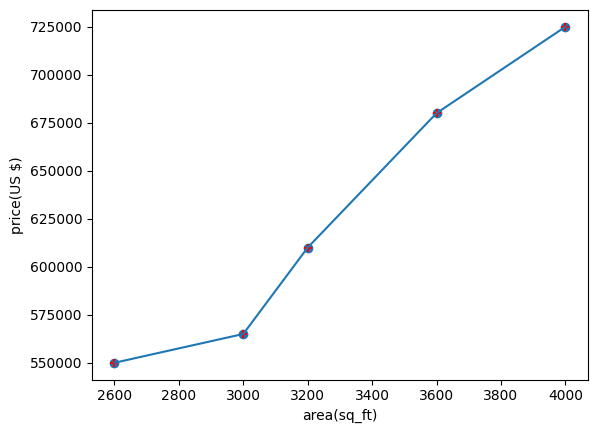

In [32]:
#now that I have checked my file. It contains two columns = area and prices.
#Lets draw the scatter plot to see the regression line from these points.
%matplotlib inline
plt.scatter(df.area,df.price)

#lets play some with scatter chart/plot by changing default color blue to red and default circles to stars along with x and y labels
plt.xlabel('area(sq_ft)')
plt.ylabel('price(US $)')
plt.scatter(df.area,df.price,color='red',marker='+')
plt.plot(df.area, df.price) #just plotting the dots of area and price

In [47]:
#lets check coefficients, slope and intercept
#for this, lets fit the linear regression model on availale data of homeprice
from sklearn import linear_model
lin_reg = linear_model.LinearRegression()
lin_reg.fit(df[['area']],df.price)

LinearRegression()

In [63]:
#model is fit meaning linear regression math will work on area and price.
#now I test few random areas for which model will predict the prices accordingly.
#like we can just write randomly or ask the user to input area and model will output predicted price.
lin_reg.predict([[3300]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [51]:
#now lets give it some test data points of area via another csv file as area.csv and let model predict the prices
test_area = pd.read_csv('/content/drive/MyDrive/Jupyter_Notebooks/areas.csv')

In [52]:
test_area.head(3) #just to check the correctness of the areas file.

,area
0,1000
1,1500
2,2300


In [53]:
lin_reg.predict(test_area)  #I wll give test_area file to lin_reg model to predict prices for me relevant to the areas in the csv file

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [55]:
#lets save this new prices in new variable as p_p so that we can allign this p_p with new column as predicted_prices in test_area csv file
p_p = lin_reg.predict(test_area)

In [56]:
#then we will add one new column in test_area csv file to save the predicted prices given by lin_reg model.
test_area['predicted_prices'] = p_p

In [70]:
#lets check whether allignment is done properly
check3 = test_area.head(3)

In [62]:
#hurray....we have predicted_prices column as expected with p_p against areas of 1000,1500,2300 and so on.
#lets create new csv file named as PREDICTION.CSV using to_csv method of pandas library.
#But the index numbers 0,1,2,....so on are irrelevant. So we will just remove it by using index=False method.
test_area.to_csv('/content/drive/MyDrive/Jupyter_Notebooks/PREDICTION.CSV', index=False)

Text(0, 0.5, 'price(US $)')

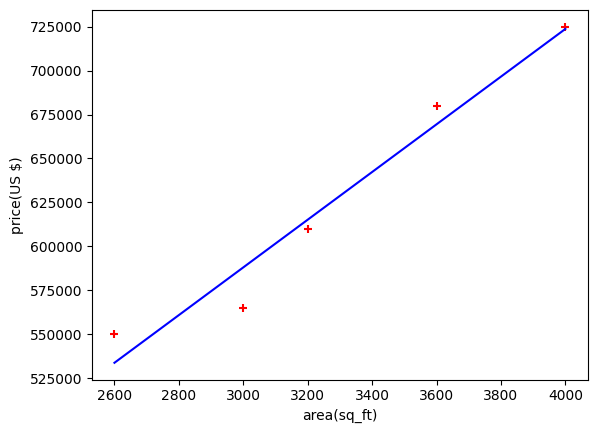

In [67]:
#finally, lets plot the predicted area via lin_reg model
plt.scatter(df.area,df.price,color='red',marker='+')
plt.plot(df.area, lin_reg.predict(df[['area']]),color='blue')
plt.xlabel('area(sq_ft)')
plt.ylabel('price(US $)')

Text(0, 0.5, 'price(US $)')

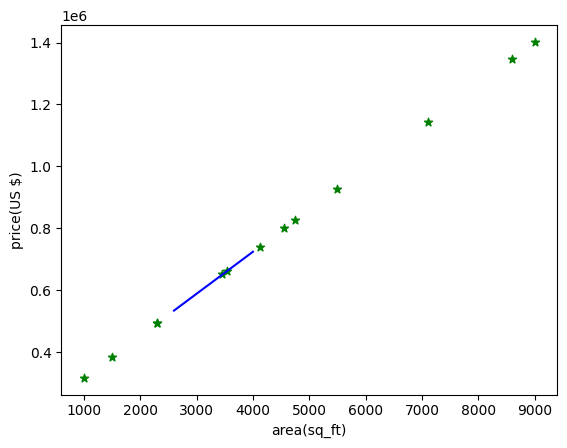

In [73]:
plt.scatter(test_area.area, test_area.predicted_prices,color='green',marker='*')
plt.plot(df.area, lin_reg.predict(df[['area']]),color='blue')
plt.xlabel('area(sq_ft)')
plt.ylabel('price(US $)')

**Time for practice with different csv file. Lets do it on our own**

**Now, lets do it with optimisation and train test data splits with the help of KrishNaik**